# 01: Introduction to Monte Carlo Methods


A great reference for this material is W. Krauth's excellent book ''Statistical Mechanics: Algorithms and Computations''



In [1]:
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
try: plt.style.use('./mc_notebook.mplstyle')
except: pass

## Estimating π

We will attempt to estimate $\pi$ by considering the unit circle embedded in a square of side 1

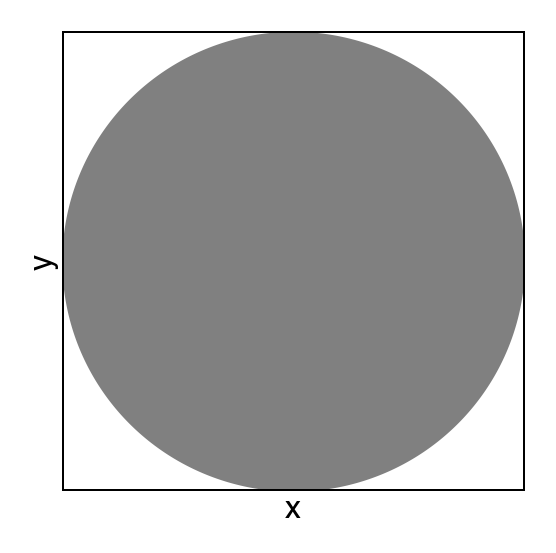

In [16]:
plt.figure(figsize=(4,4))
cx = np.linspace(-1,1,1000)
cy = np.sqrt(1-cx**2)

plt.fill_between(cx,-cy,cy, color='gray')
plt.xlabel('x')
plt.ylabel('y')    
plt.xticks([]);
plt.yticks([]);

We know the area of the circle is $A_\circ = \pi$ while the area of the square is $A_\square = 4$ thus we can compute $\pi$ as the ratio:

\begin{equation}
\pi = 4 \frac{A_\circ}{A_\square}
\end{equation}

This ratio can be estimated using a simple ''children's game'' of pebble toss.

### Direct Sampling

1. Randomly toss a pebble into the square. 
2. Record the position where it lands $\vec{r} = (x,y)$
3. Determine whether the stone fell inside the circle: $r < 1$
4. Repeat $N$ times and determine the total number of hits $N_{\rm hits}$

We can then determine:

\begin{equation}
\frac{N_{\rm hits}}{N} = \frac{A_\circ}{A_\square} = \frac{\pi}{4}\, .
\end{equation}

In [ ]:
N = 2**12

# sample inside the square
x = np.random.uniform(-1,1,N)
y = np.random.uniform(-1,1,N)

# count the number of hits
N_hits = np.sum(x**2+y**2<1)
print('π ≃ %6.4f' % (4*N_hits/N))

In [ ]:
plt.figure(figsize=(4,4))
cx = np.linspace(-1,1,1000)
cy = np.sqrt(1-cx**2)

plt.plot(x,y, 'k', marker='o', linewidth=0, markersize=2, markeredgewidth=0)

plt.fill_between(cx,-cy,cy, color='gray')
plt.xlabel('x')
plt.ylabel('y')    
plt.xticks([]);
plt.yticks([]);

### Markov Chain Sampling

Suppose that we are not able reach the entire area of the square by throwing pebbles.  An alternative sampling approach proceeds by:

1. Start in the corner of the squre $\vec{r} = (1,1)$
2. Throw a pebble
    * if the new pebble is inside the square, move to its position
    * if not, drop the pebble at your current location
3. Record the position (new or current) $\vec{r} = (x,y)$
4. Determine if $r < 1$
5. Repeat $N$ times and determine the relative number of hits

The hallmark of this type of sampling is that the $(n+1)^{\rm th}$ configuration only depends on the $n^{\rm th}$ one.

In [ ]:
N = 2**12
x = np.ones(N)
y = np.ones(N)
δ = 0.3

for n in range(1,N):
    # throw in a box of side δ
    Δx = np.random.uniform(-δ,δ)
    Δy = np.random.uniform(-δ,δ)
    
    # update only if the new position is inside the square
    x[n] = x[n-1] + Δx*(np.abs(x[n-1]+Δx) < 1)
    y[n] = y[n-1] + Δy*(np.abs(y[n-1]+Δy) < 1)

# count the number of hits
N_hits = np.sum(x**2+y**2<1)
print('π ≃ %6.4f' % (4*N_hits/N))

In [ ]:
plt.figure(figsize=(4,4))
cx = np.linspace(-1,1,1000)
cy = np.sqrt(1-cx**2)

plt.plot(x,y, 'k', marker='o', linewidth=0.2, markersize=2, markeredgewidth=0)

plt.fill_between(cx,-cy,cy, color='gray')
plt.xlabel('x')
plt.ylabel('y')    
plt.xticks([]);
plt.yticks([]);

## What are we doing?

We are using different sampling schemes to compute the ratio of two-dimensional integrals:

\begin{align*}
\frac{A_\circ}{A_\square} = \frac{\pi}{4} &= 
\frac{\int_{-1}^1 dx \int_{-\sqrt{1-x^2}}^{\sqrt{1-x^2}} dy}{\int_{-1}^1 dx \int_{-1}^1 dy}\\
&= \frac{\int_{-1}^1 dx \int_{-1}^1 dy\, \mathcal{O}(x,y)}{\int_{-1}^1 dx \int_{-1}^1 dy}
\end{align*}

where we have defined a function:

\begin{equation}
\mathcal{O}(x,y) = 
\begin{cases}
1 &;& x^2 + y^2 < 1 \\
0 &;& \text{otherwise}
\end{cases}.
\end{equation}

This integral can be re-written as an ''average'' of the function $\mathcal{O}(x,y)$ over the square with side $2$ by defining the uniform probability distribution:

\begin{equation}
\pi(x,y) = \frac{1}{{\int_{-1}^1 dx \int_{-1}^1 dy}}
\end{equation}

which yields:

\begin{align*}
\langle \mathcal{O} \rangle &= \int_{-1}^1 dx \int_{-1}^1 dy\, \pi (x,y)\, \mathcal{O}(x,y) \newline 
&\simeq \frac{1}{N} \sum_{n=0}^{N-1} \mathcal{O}(x_n,y_n) = \frac{N_{\rm hits}}{N} \simeq \frac{\pi}{4}
\end{align*}

where $x_n,y_n \in \pi(x,y)$; i.e. in the last line the probablity distribution doesn't explicity apear, **it is sampled**!  

Using this idea we can re-write **any** d-dimensional integral as a Monte Carlo sampling problem:

\begin{align*}
I = \frac{\int_{\Omega} d^d x\, f(x_1,\ldots,x_d)}{\int_\Omega d^d x\,} & = \int_\Omega d^d x\, \pi(x_1,\ldots,x_n) \, f(x_1,\ldots,x_n)
= \langle f \rangle \newline
&\simeq \frac{1}{N} \sum_n f(\mathbf{x}_n)
\end{align*}

where $\mathbf{x}_n$ is a vector sampled accoridng to the $d$-dimensional uniform distribution $\pi$.